# 라이브러리 불러오기

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# 데이터 불러오기

In [2]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
...,...,...,...,...,...
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [3]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
...,...,...,...,...
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [4]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)
movies.head(6)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


# 연습문제

## 1. ratings과 users 데이터를 merge한 후 다음과 같은 user_rating 데이터셋을 만드세요.

In [222]:
user_rating = users.merge(ratings, on="user_id")
user_rating

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
...,...,...,...,...,...,...,...,...
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648
1000208,6040,M,25,6,11106,1097,4,956715569


## 2. 다음과 같이 영화(movie_id)별로 남녀(gender)에 따른 rating의 평균과 그 개수(count)을 구해보세요.

In [174]:
user_rating = user_rating.groupby(["movie_id", "gender"]).agg(mean=('rating', 'mean'), count=('rating', 'count')).reset_index()

user_rating


,movie_id,gender,mean,count
0,1,F,4.19,591
1,1,M,4.13,1486
2,2,F,3.28,176
...,...,...,...,...
7149,3951,M,4.04,23
7150,3952,F,3.76,105
7151,3952,M,3.79,283


## 3. 다음과 같은 플랏을 그려보고 평가의 수가 적을수록 그 편차가 커지는 현상을 확인해보세요.

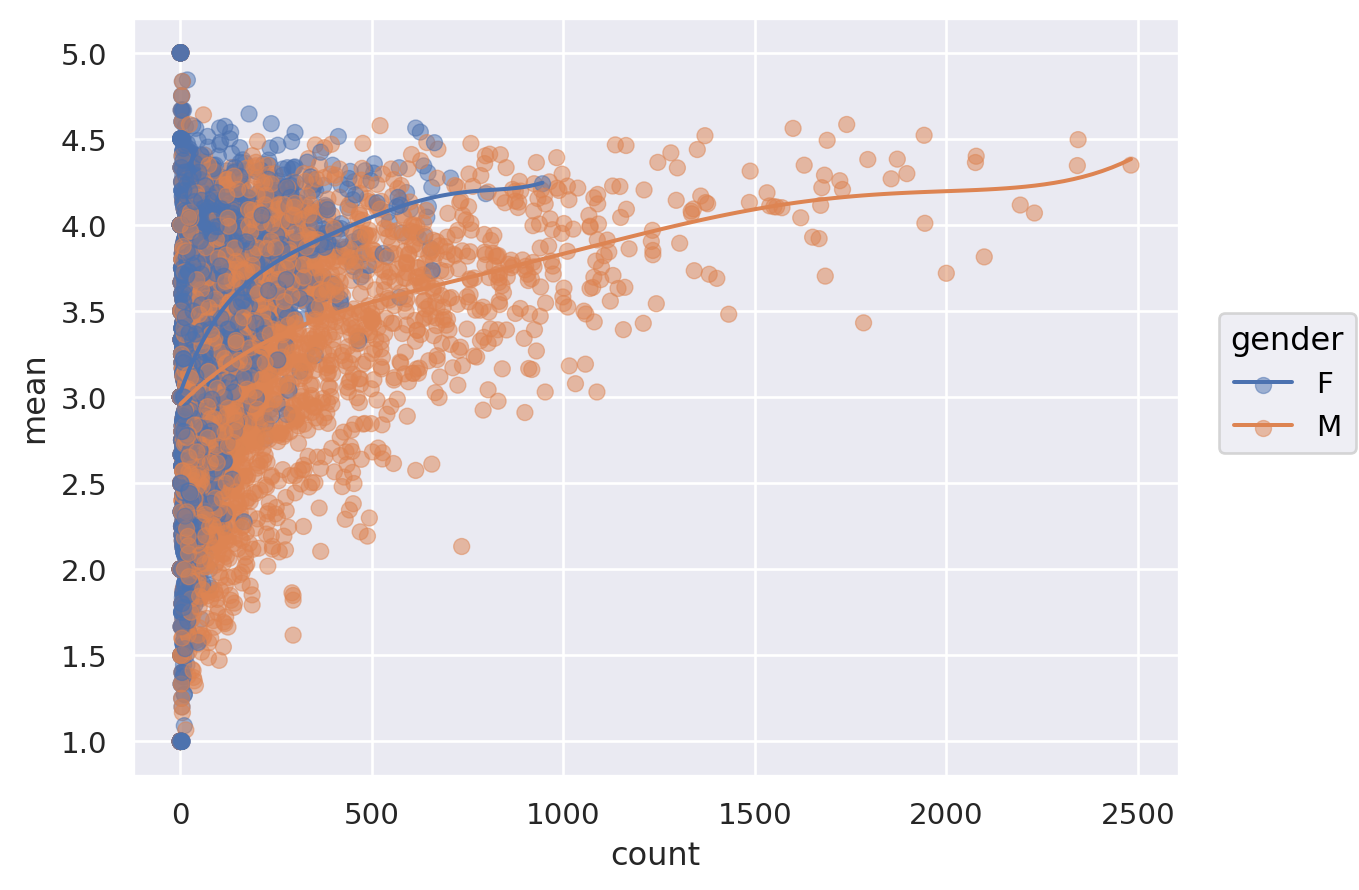

In [175]:
(
    so.Plot(user_rating, x="count", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Dot(alpha=.5))
    .add(so.Line(), so.PolyFit(5))
)

### -1. 평가의 수가 적을수록 그 편차가 커지는 현상
#### 평가의 수가 적을수록 평균이 극단적인 값으로 쉽게 왜곡될 수 있기 때문입니다.
#### 예를 들어, 평가가 1개인 영화의 평균 평점이 5점인 경우, 새로운 평가가 1점이면 평균 평점이 3점으로 떨어집니다.
#### 반면, 평가가 100개인 영화의 평균 평점이 5점인 경우, 새로운 평가가 1점이면 평균 평점은 4.98점으로 거의 변하지 않습니다.

### -2. 평가의 수가 많은 영화일수록 평가가 높아지는 현상
#### 평가의 수가 많을수록 평균이 전체 평가를 더 잘 반영하기 때문입니다.
#### 예를 들어, 100명이 평가한 영화의 평균 평점이 4점인 경우, 새로운 평가가 1점이더라도 평균 평점은 3.98점으로 거의 변하지 않습니다.
#### 반면, 평가가 10명인 영화의 평균 평점이 4점인 경우, 새로운 평가가 1점이면 평균 평점이 3점으로 떨어집니다.

### -3. 남녀의 평가에 차이가 벌어지는 현상:
#### 영화의 장르, 주제, 연출 스타일 등에 따라 남성과 여성의 선호도가 다르기 때문입니다.
#### 예를 들어, 액션 영화는 남성이 선호하는 경향이 있고, 로맨스 영화는 여성이 선호하는 경향이 있습니다.
#### 또한, 남성과 여성이 영화를 평가하는 기준이 다를 수도 있습니다.


## 4. 3번에서 플랏에 .limit(x=(0, 500), y=(2.5, 4.5))을 추가하여 평가 개수(count)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 대략 일정하게 되는지 살펴보세요.

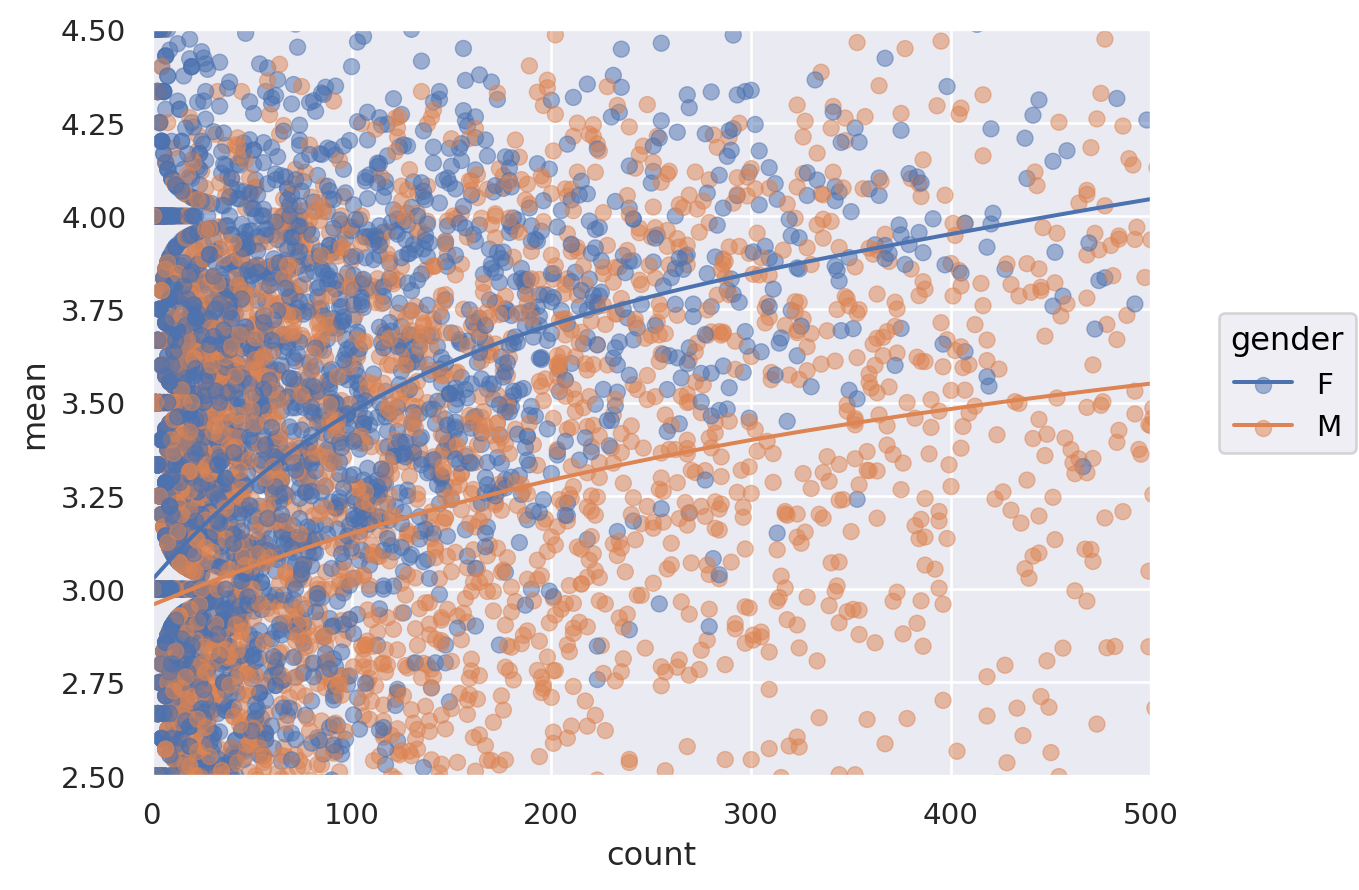

In [176]:
# prompt: 3번에서 플랏에 .limit(x=(0, 500), y=(2.5, 4.5))을 추가하여 평가 개수(count)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 대략 일정하게 되는지 살펴보세요.

(
    so.Plot(user_rating, x="count", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Dot(alpha = .5))
    .add(so.Line(), so.PolyFit(5))
    .limit(x=(0, 500), y=(2.5, 4.5))
)


## 5. 영화별로 남녀의 평가가 크게 갈리는 영화들을 찾기 위해

## 5.1 2번에서 구한 데이터에서 남녀 모두 rating이 300개 이상 있는 영화로만 간추려보세요.

In [177]:
popular_movies = user_rating[user_rating['count'] >= 300]

popular_movies = popular_movies[
    (popular_movies.groupby("movie_id")["gender"].transform(lambda x: x.nunique()) == 2) &
    (popular_movies['count'] >= 300)]
popular_movies

,movie_id,gender,mean,count
0,1,F,4.19,591
1,1,M,4.13,1486
20,11,F,3.92,379
...,...,...,...,...
6452,3578,M,4.11,1539
6773,3751,F,3.89,367
6774,3751,M,3.88,962


## 5.2 이 데이터를 popular_movies라고 명명하고,
### 이 데이터를 gender에 관해 wide format으로 변환한 후; pivot()을 이용
### 여자의 평균 rating에서 남자의 평균 rating을 뺀 그 차이를 데이터에 추가한 후; assign()을 이용
### 그 차이로 sort한 후,

In [178]:
# prompt: popular_movies를 gender에 관해 wide format으로 변환한 후; pivot()을 이용
# 여자의 평균 rating에서 남자의 평균 rating을 뺀 그 차이를 데이터에 추가한 후; assign()을 이용
# 그 차이로 sort한 후,

popular_movies_wide = popular_movies.pivot(index="movie_id", columns="gender", values="mean")
popular_movies_wide["diff"] = popular_movies_wide["F"] - popular_movies_wide["M"]
popular_movies_wide = popular_movies_wide.sort_values(by="diff", ascending=False)

popular_movies_wide

gender,F,M,diff
movie_id,,,
2657,3.67,3.16,0.51
1028,4.20,3.73,0.47
920,4.27,3.83,0.44
...,...,...,...
589,3.79,4.12,-0.33
1221,4.04,4.44,-0.40
2791,3.66,4.06,-0.41


## 5.3 여자의 선호가 더 높은 영화 5편과 남자의 선호가 더 높은 영화 5편 (선호 차이의 크기 순서로)을 구해보세요.
### 이를 위해서 movies 테이블 안의 영화제목(title)을 merge()를 이용해 추가하세요.

In [165]:
movies_title = movies[["movie_id", "title"]]
popular_movies_wide_title = popular_movies_wide.merge(movies_title, on="movie_id")

In [166]:
print("여자 선호도가 더 높은 영화 Top 5:")
popular_movies_wide_title.head()

여자 선호도가 더 높은 영화 Top 5:


,movie_id,F,M,diff,title
0,2657,3.67,3.16,0.51,"Rocky Horror Picture Show, The (1975)"
1,1028,4.20,3.73,0.47,Mary Poppins (1964)
2,920,4.27,3.83,0.44,Gone with the Wind (1939)
3,17,4.23,3.82,0.41,Sense and Sensibility (1995)
4,1188,4.17,3.77,0.41,Strictly Ballroom (1992)


In [167]:
print("남자 선호도가 더 높은 영화 Top 5:")
popular_movies_wide_title.tail()

남자 선호도가 더 높은 영화 Top 5:


,movie_id,F,M,diff,title
126,1240,3.90,4.21,-0.31,"Terminator, The (1984)"
127,1214,3.89,4.22,-0.33,Alien (1979)
128,589,3.79,4.12,-0.33,Terminator 2: Judgment Day (1991)
129,1221,4.04,4.44,-0.40,"Godfather: Part II, The (1974)"
130,2791,3.66,4.06,-0.41,Airplane! (1980)


## 6. 3번 플랏에서 유추되듯이 평가의 개수가 영화의 완성도 혹은 인기도를 파악할 수 있는 대략적인 지표가 될 수 있습니다. 즉, 평가수가 많을 수록 평점도 높습니다. 따라서 평가 개수를 바탕으로 인기도(popularity)를 수치화 하려고 합니다.

### 다음과 같은 count를 20개의 구간으로 discretize해주는 함수를 성별로 grouping된 user_rating 데이터에 apply() 하세요.

In [179]:
def popular(g):
    g["popularity"] = pd.qcut(g["count"], q=20, labels=False)
    return g

user_rating = user_rating.groupby("gender").apply(popular)
user_rating

movie_id gender  mean  count  popularity
gender                                               
F      0            1      F  4.19    591          19
       2            2      F  3.28    176          17
       4            3      F  3.07    136          16
...               ...    ...   ...    ...         ...
M      7147      3950      M  3.68     44           7
       7149      3951      M  4.04     23           4
       7151      3952      M  3.79    283          15

[7152 rows x 5 columns]

### 이제, 다음과 같이 popularity에 따라 평점이 높아지는 현상을 성별을 고려한 후 본 결과를 아래와 같이 플랏을 통해 확인해봅니다.

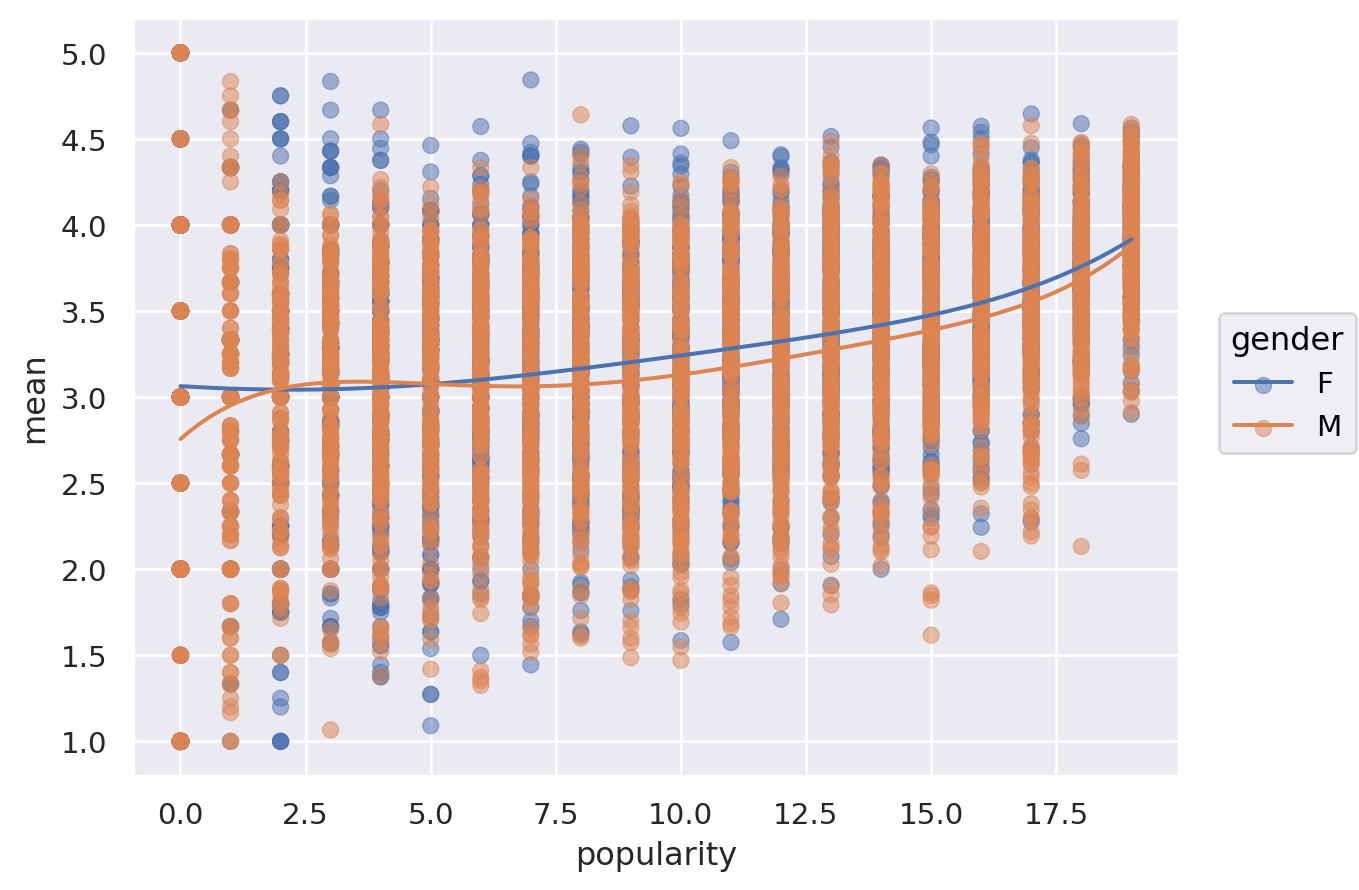

In [180]:
(
    so.Plot(user_rating, x="popularity", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Dot(alpha=.5))
    .add(so.Line(), so.PolyFit(5))
)

### 남성 유저와 여성 유저의 비율에 큰 차이 (4331:1709)가 있는 것을 고려했을 때, 어떻게 이 현상을 설명할 수 있을까요?
#### 남성 유저와 여성 유저의 비율이 크게 차이나는 것은 남성이 영화를 보는 경향이 여성보다 더 많기 때문입니다. 이는 남성들이 영화를 보는 데 더 관심이 있거나, 영화에 더 많은 시간을 할애할 수 있기 때문일 수 있습니다. 또한, 남성들이 영화 평가를 남기는 경향이 여성보다 더 많을 수도 있습니다.

#### 남성 유저와 여성 유저의 비율이 크게 차이나는 것을 고려했을 때, 남성 유저와 여성 유저의 평점에 차이가 있을 수 있습니다. 이는 남성과 여성이 영화를 보는 취향이 다르기 때문일 수 있습니다. 예를 들어, 남성은 액션 영화를 선호하는 경향이 있고, 여성은 로맨스 영화를 선호하는 경향이 있습니다. 또한, 남성과 여성이 영화를 평가하는 기준이 다를 수도 있습니다.

#### 따라서 남성 유저와 여성 유저의 비율이 크게 차이나는 것을 고려했을 때, 인기도에 따른 평점의 차이를 분석할 때는 남성 유저와 여성 유저의 비율을 고려하여 분석해야 합니다.

## 7. 남녀별로 평점의 편차가 큰, 즉 의견이 분분한 영화들을 구해봅니다.
### 5번에서 구한 popular_movies에 한해 남녀 각각에 대해 영화별로 평점의 편차를 표준편차로 구해보고,
### 다음 method를 이용하는 함수를 정의하고 apply()로 적용해 봅니다. df.nlargest(n, "variable name", keep="all")
### 영화제목을 movies 데이터와 merge하여 표시합니다.

In [183]:
# prompt: ## 7. 남녀별로 평점의 편차가 큰, 즉 의견이 분분한 영화들을 구해봅니다.
# ### 5번에서 구한 popular_movies에 한해 남녀 각각에 대해 영화별로 평점의 편차를 표준편차로 구해보고,
# ### 다음 method를 이용하는 함수를 정의하고 apply()로 적용해 봅니다. df.nlargest(n, "variable name", keep="all")
# ### 영화제목을 movies 데이터와 merge하여 표시합니다.



def std_dev(g):
    g["std_dev"] = g["rating"].std()
    return g

popular_movies_id = user_rating[user_rating['movie_id'].isin(popular_movies['movie_id'].unique())]
popular_movies_id
#popular_moviesd = popular_movies_id.groupby("gender").apply(std_dev)

def find_controversial(df):
  return df.nlargest(2, "std_dev", keep="all").merge(movies[["movie_id", "title"]], on="movie_id")

controversial_movies = popular_moviesd.groupby("gender").apply(find_controversial)
print("여성의 의견이 분분한 영화 Top 5:")
print(controversial_movies["F"])
print("남성의 의견이 분분한 영화 Top 5:")
print(controversial_movies["M"])


ValueError: 'gender' is both an index level and a column label, which is ambiguous.

## 연습문제 8
### 이제 초점을 유저들에게 돌려, 유저들의 특성을 고려해봅니다. 일반적으로 같은 소스(사람)에서 온 데이터는 비슷한 성향을 띄는데 이를 depenency의 문제라고 합니다. 한 가족 구성원으로부터 왔다든가, 같은 학교의 학생들과 같이 구체적으로 명시하기 어렵지만 데이터 상에서 비슷한 군집을 이룹니다. 이 데이터의 경우 동일한 유저들의 특성이 존재할 수 있는데, 예를 들어 후한 점수를 준다든가, 같은 유저라도 어떤 장르의 영화는 매우 낮은 평점을 준다든가 하는 현상이 있을 수 있는데 이를 알아봅니다.

### 8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.

In [221]:
# prompt: 8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.

user_rating.groupby("gender")["rating"].count().to_frame().reset_index().rename(columns={"rating":"count"})


,gender,count
0,F,246440
1,M,753769


### 8.2 개인별로 평점의 평균(mean)과 표준편차(std), 개수(count)를 구합니다; 성별 차는 없는 것으로 간주함

In [228]:
# prompt: 8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.
# 8.2 개인별로 평점의 평균(mean)과 표준편차(std), 개수(count)를 구합니다; 성별 차는 없는 것으로 간주함
# 8.3 이 세 변수의 관계를 보기 위해, 평점 개수(count)를 10개의 구간으로 pd.cut을 이용해 discretize해서 살펴봅니다.
# 8.1에서 분포를 살펴보았으면, 개수를 먼저 log 스케일로 변환해서 구간으로 쪼개는 것이 유리함을 알 것입니다. (np.log 이용)

user_rating_agg = user_rating.groupby("user_id").agg(mean=('rating', 'mean'), std=('rating', 'std'), count=('rating', 'count'))

user_rating_agg["log_count"] = np.log(user_rating_agg["count"])
user_rating_agg["count_level"] = pd.cut(user_rating_agg["log_count"], bins=9, labels=False)
user_rating_agg.reset_index(inplace=True)
user_rating_agg

,user_id,mean,std,count,log_count,count_level
0,1,4.19,0.68,53,3.97,1
1,2,3.71,1.00,129,4.86,3
2,3,3.90,0.98,51,3.93,1
...,...,...,...,...,...,...
6037,6038,3.80,1.11,20,3.00,0
6038,6039,3.88,0.73,123,4.81,3
6039,6040,3.58,1.18,341,5.83,5


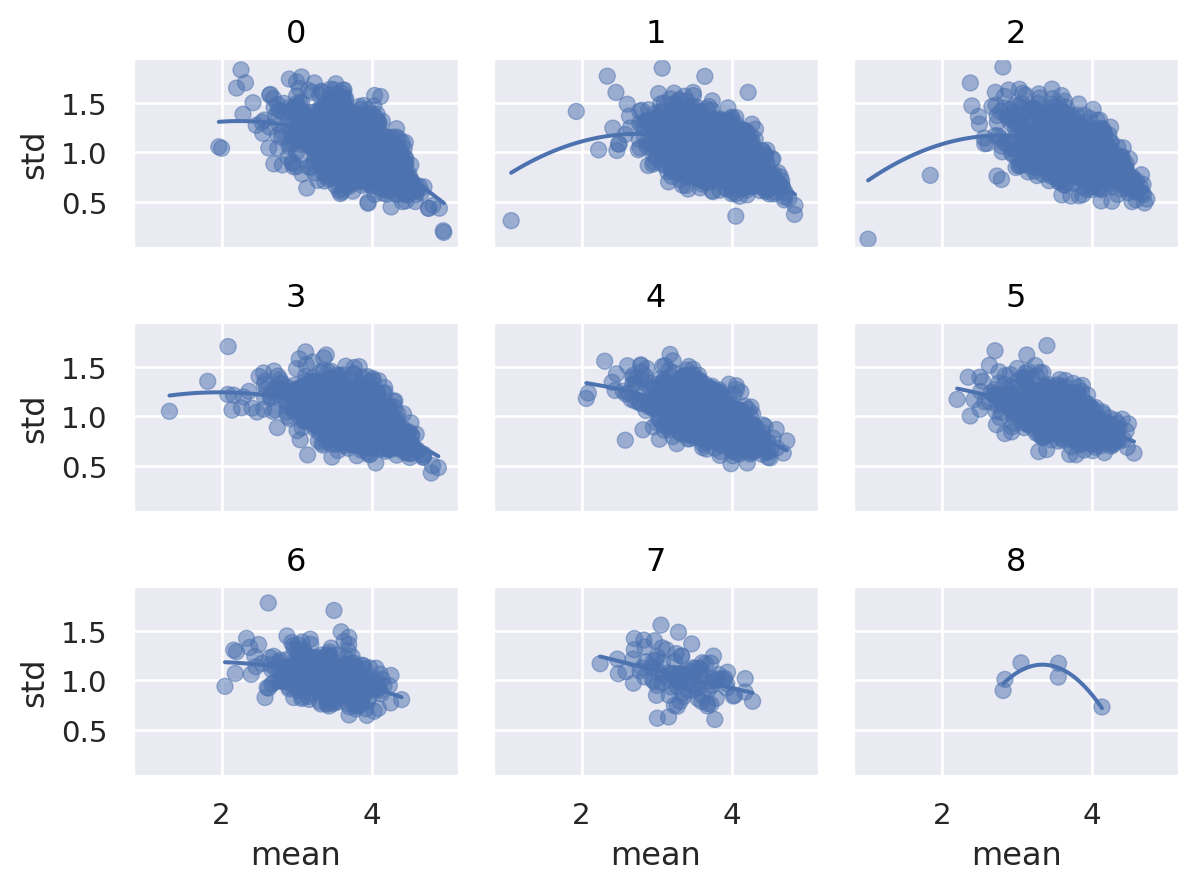

In [229]:
(
    so.Plot(user_rating_agg, x="mean", y="std")  # color mapping이 이후 모든 layer에 적용
    .facet(col="count_level", wrap = 3)
    .add(so.Dot(alpha=.5))
    .add(so.Line(), so.PolyFit(2))
)


## 연습문제 9
### 장르별로 남녀의 선호 차이를 두 관점 1) 평점의 개수/비율, 2) 평점의 평균의 관점에서 따로 살펴봅니다.
#### movies 데이터에서 장르(genres)는 여러 장르에 포함되는 것을 | 기호로 나누어 표기되어 있고, 분석을 위해서 다음 코드를 이용해 long format으로 각 장르가 열에 한번씩만 나오도록 다음과 같이 바꾸세요.
#### 이 movie_long과 1번에서 만든 user_rating을 merge한 후 다음 문제를 이어가세요.

In [223]:
movies_long = movies.copy()

movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")

movies_long.head(8)

,movie_id,title,genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
...,...,...,...
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance


In [224]:
# prompt: 이 movie_long과 1번에서 만든 user_rating을 merge한 후 다음 문제를 이어가세요.

user_rating_long = user_rating.merge(movies_long, on="movie_id")
user_rating_long


,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
2101812,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Drama
2101813,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Western
2101814,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


#### 9.1 장르별로 평점의 개수를 간단히 플랏으로 살펴보는데 남녀 별로 따로 비율이 나오도록 해보세요.

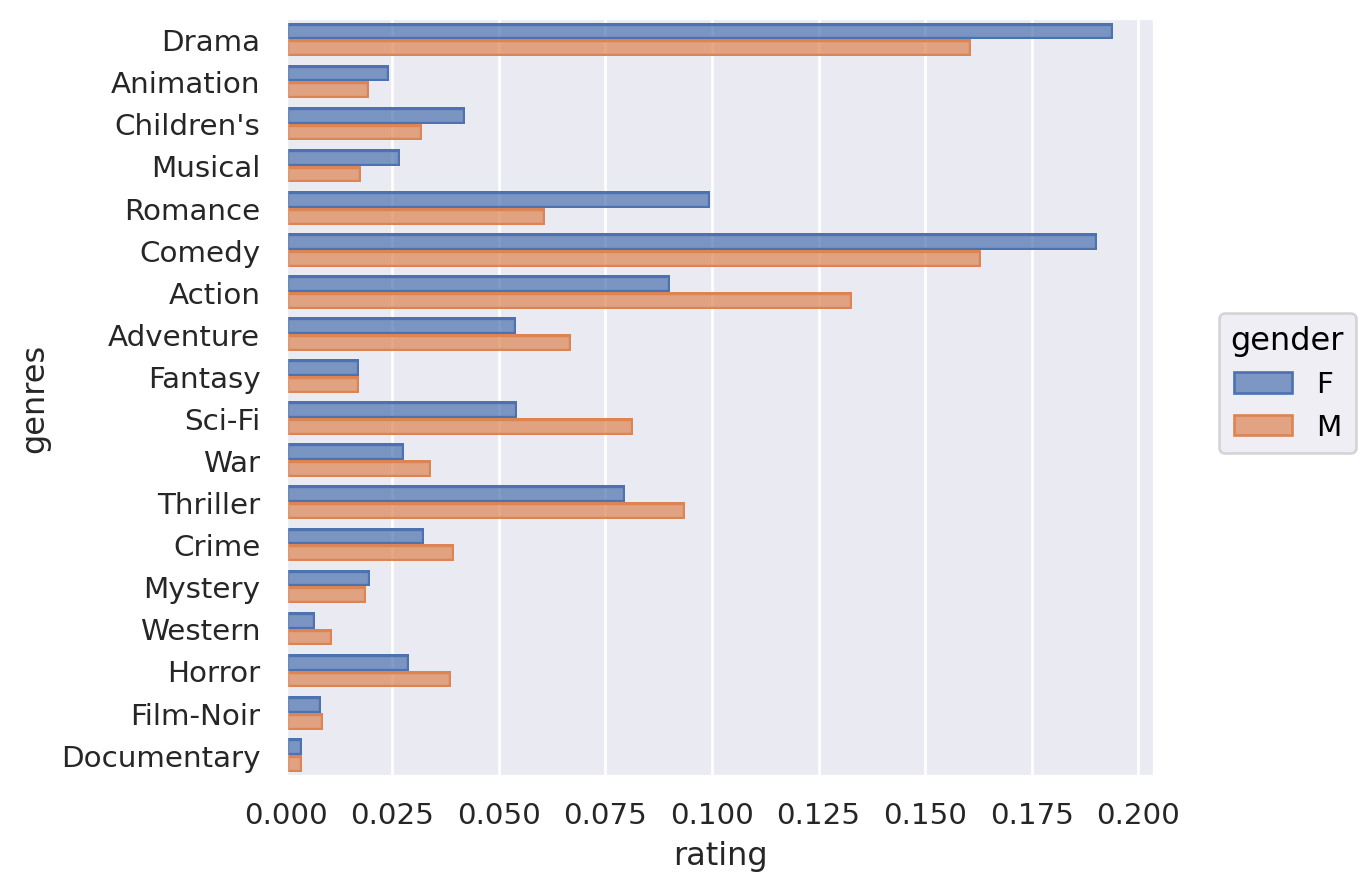

In [239]:
# prompt: 9.1 장르별로 평점의 개수를 간단히 플랏으로 살펴보는데 남녀 별로 따로 비율이 나오도록 해보세요.
# x는 장르, y는 평점의 개수
# so.Hist("proportion", common_norm=False)이 필요할 수 있음

(
    so.Plot(user_rating_long, x="rating", y="genres", color="gender")
    .add(so.Bar(),so.Hist("proportion", common_norm=False), so.Dodge())
)
